In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import os
from os import listdir
from PIL import Image
import tensorflow as tf
from keras.preprocessing import image
from tensorflow.keras.utils import img_to_array, array_to_img
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dropout, Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import model_from_json
from keras.utils import to_categorical

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
print(tf. __version__)

2.16.1


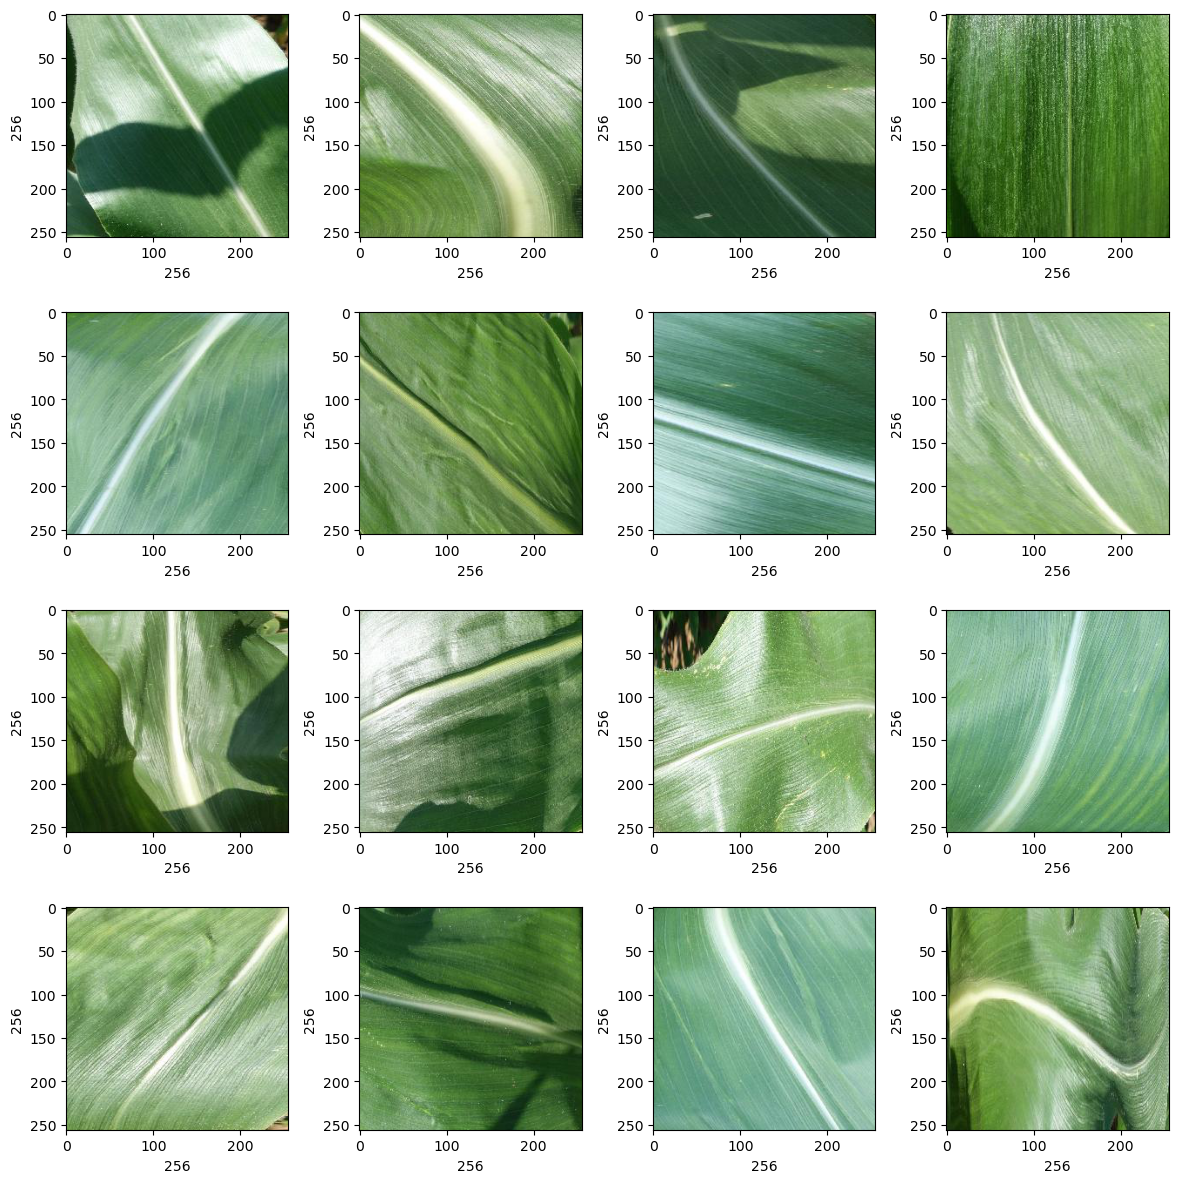

In [4]:
plt.figure(figsize=(12,12))
path="C:/Users/PC-ACER/Downloads/archive (2)/plantvillage dataset/color/Corn_(maize)___healthy"
for i in range(1,17):
  plt.subplot(4,4,i)
  plt.tight_layout()
  rand_img=imread(path+'/'+random.choice(sorted(os.listdir(path))))
  plt.imshow(rand_img)
  plt.xlabel(rand_img.shape[1], fontsize=10)
  plt.ylabel(rand_img.shape[0], fontsize=10)

In [5]:
def convert_image_to_array(image_dir):
  try:
    image=cv2.imread(image_dir)
    if image is not None:
      image=cv2.resize(image,(256,256))
      return img_to_array(image)
    else:
      return np.array([])
  except Exception as e:
    print(f"Error: {e}")
    return None

In [6]:
dir="C:/Users/PC-ACER/Downloads/archive (2)/plantvillage dataset/color"
image_list,label_list=[],[]
all_labels=['Corn_(maize)_Cercospora_Gray_leaf_spot', 'Corn_(maize)_Common_rust', 'Corn_(maize)___healthy']
binary_labels=[0,1,2]
temp=-1

for directory in ['Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___healthy']:
  plant_image_list=listdir(f"{dir}/{directory}")
  temp+=1
  for files in plant_image_list:
    image_path=f"{dir}/{directory}/{files}"
    image_list.append(convert_image_to_array(image_path))
    label_list.append(binary_labels[temp])

In [7]:
label_counts=pd.DataFrame(label_list).value_counts()
label_counts.head()

1    1192
2    1162
0     513
Name: count, dtype: int64

In [8]:
image_list[0].shape

(256, 256, 3)

In [9]:
x_train,x_test,y_train,y_test= train_test_split(image_list,label_list,test_size=0.2,random_state=10)

In [10]:
x_train=np.array(x_train,dtype=np.float16)/255.0
x_test=np.array(x_test,dtype=np.float16)/255.0
x_train=x_train.reshape(-1,256,256,3)
x_test=x_test.reshape(-1,256,256,3)

In [11]:
x_train[0].shape

(256, 256, 3)

In [12]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [13]:
model=Sequential()
model.add(Conv2D(32,(3,3),padding="same",input_shape=(256,256,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Conv2D(16,(3,3),padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(8,activation="relu"))
model.add(Dense(3,activation="softmax"))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 256, 256, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 85, 85, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 85, 85, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 42, 42, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 28224)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 8)                   │         225,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │              27 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 231,347 (903.70 KB)

 Trainable params: 231,347 (903.70 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(loss="categorial_crossentropy",optimizer=Adam(0.0001),metrics=["accuracy"])

In [15]:
x_train,x_val,y_train,y_val= train_test_split(x_train,y_train,test_size=0.2,random_state=10)

In [16]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
epochs=50
batch_size=128
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val))


Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.5732 - loss: 0.8800 - val_accuracy: 0.8431 - val_loss: 0.3475
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 14s 882ms/step - accuracy: 0.8400 - loss: 0.3278 - val_accuracy: 0.9063 - val_loss: 0.2135
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 13s 875ms/step - accuracy: 0.9357 - loss: 0.1992 - val_accuracy: 0.9325 - val_loss: 0.1356
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 13s 884ms/step - accuracy: 0.9663 - loss: 0.0838 - val_accuracy: 0.9782 - val_loss: 0.0644
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 14s 928ms/step - accuracy: 0.9826 - loss: 0.0558 - val_accuracy: 0.9869 - val_loss: 0.0400
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 14s 895ms/step - accuracy: 0.9845 - loss: 0.0420 - val_accuracy: 0.9782 - val_loss: 0.0594
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 14s 893ms/step - accuracy: 0.9982 - loss: 0.0139 - val_accuracy: 0.9891 - val_loss: 0.0240
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 15s 960ms/step - accuracy: 0.9979 - loss: 0.0094 - val_accurac

In [18]:
model.save=("/content/drive/MyDrive/Ethic Project/Model/corn_plant_disease_model.h5")

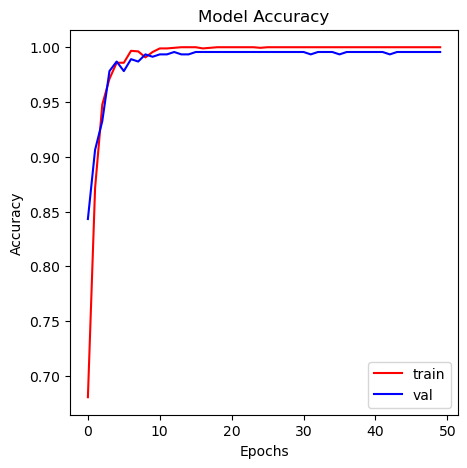

In [19]:
plt.figure(figsize=(5,5))
plt.plot(history.history["accuracy"],color="r")
plt.plot(history.history["val_accuracy"],color="b")
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(["train","val"])
plt.show()

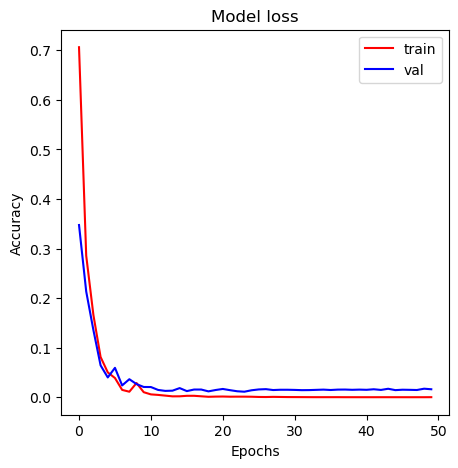

In [20]:
plt.figure(figsize=(5,5))
plt.plot(history.history["loss"],color="r")
plt.plot(history.history["val_loss"],color="b")
plt.title("Model loss")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(["train","val"])
plt.show()

In [21]:
print("Calculating model accuracy")
scores=model.evaluate(x_test,y_test)
print(f"Test Accuracy: {scores[1]*100}")

Calculating model accuracy
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.9971 - loss: 0.0128
Test Accuracy: 99.47735071182251


In [22]:
y_pred=model.predict(x_test)

18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step


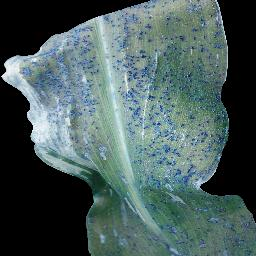

In [23]:
img=array_to_img(x_test[11])
img

In [24]:
print("Original Label: ",all_labels[np.argmax(y_test[11])])
print("Predicted Label: ",all_labels[np.argmax(y_pred[4])])
print(y_pred[2])

Original Label:  Corn_(maize)_Common_rust
Predicted Label:  Corn_(maize)_Cercospora_Gray_leaf_spot
[3.9425848e-07 8.6851420e-10 9.9999964e-01]


In [25]:
for i in range(50):
  print(all_label[np.argmax(y_test[i])],"-",all_labels[np.argmax(y_pred[i])])

NameError: name 'all_label' is not defined